### ex6 Support vector machines


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import minimize
from scipy.io import loadmat

####  Part 1: Loading and Visualizing Data 
We start the exercise by first loading and visualizing the dataset.  The following code will load the dataset into your environment and plot the data.

In [2]:
# Load from ex6data1: 
# You will have X, y in your environment
data1=loadmat('ex6data1.mat');
X=data1['X']
print(X.shape)
y=data1['y']
print(y.shape)

(51, 2)
(51, 1)


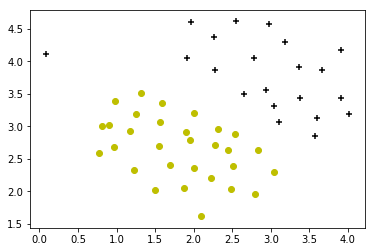

In [3]:
# Plot training data
def plotData(X, y):
# index for y=1
    pos=(y==1)
    neg=(y==0)
    plt.scatter(X[:,0].reshape(-1,1)[pos], X[:,1].reshape(-1,1)[pos], color='k', marker='+')
    plt.scatter(X[:,0].reshape(-1,1)[neg], X[:,1].reshape(-1,1)[neg], color='y', marker='o')
plotData(X, y)

###  Part 2: Training Linear SVM 

The following code will train a linear SVM on the dataset and plot the decision boundary learned.

#### 2.1 SVM with linear kernels

In [4]:
# Linear kernal similarity function
def linearKernel(x1, x2):
#LINEARKERNEL returns a linear kernel between x1 and x2
#   sim = linearKernel(x1, x2) returns a linear kernel between x1 and x2
#   and returns the value in sim

# Ensure that x1 and x2 are column vectors
# Compute the kernel
    sim = np.dot(x1.T, x2)  # dot product
    return sim

In [5]:
# SVM with Gaussian Kernel to do non-linear classifier
def gaussianKernel(x1, x2, sigma):
    
#   RBFKERNEL returns a radial basis function kernel between x1 and x2
#   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
#   and returns the value in sim

# Ensure that x1 and x2 are column vectors

# You need to return the following variables correctly.
    sim = 0;

# ====================== YOUR CODE HERE ======================
# Instructions: Fill in this function to return the similarity between x1
#               and x2 computed using a Gaussian kernel with bandwidth
#               sigma
    sim=np.exp(-np.dot((x1-x2).T, (x1-x2))/(2*sigma**2))
    return sim


In [6]:
def gaussianKernelGramMatrix(x1, x2, sigma):
    
#   RBFKERNEL returns a radial basis function kernel between x1 and x2
#   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
#   and returns the value in sim

# Ensure that x1 and x2 are column vectors

# You need to return the following variables correctly.
    sim = np.zeros((x1.shape[0], x2.shape[0]));

# ====================== YOUR CODE HERE ======================
# Instructions: Fill in this function to return the similarity between x1
#               and x2 computed using a Gaussian kernel with bandwidth
#               sigma
    for i in range(x1.shape[0]):
        for j in range(x2.shape[0]):
            sim[i,j]=np.exp(-np.dot((x1[i,:]-x2[j,:]).T, (x1[i,:]-x2[j,:]))/(2*sigma**2))
    return sim

In [7]:
from sklearn import svm
import numpy as np

def svmTrain(X, y, C, kernelFunction, tol=1e-3, max_passes=-1, sigma=0.1):
    """Trains an SVM classifier"""

    y = y.flatten() # prevents warning

    # alternative to emulate mapping of 0 -> -1 in svmTrain.m
    #  but results are identical without it
    # also need to cast from unsigned int to regular int
    # otherwise, contour() in visualizeBoundary.py doesn't work as expected
    # y = y.astype("int32")
    # y[y==0] = -1

    if kernelFunction == "gaussian":
        clf = svm.SVC(C = C, kernel="precomputed", tol=tol, max_iter=max_passes, verbose=2)
        return clf.fit(gaussianKernelGramMatrix(X,X, sigma=sigma), y)

    # elif kernelFunction == "linear":
    #     clf = svm.SVC(C = C, kernel="precomputed", tol=tol, max_iter=max_passes, verbose=2)
    #     return clf.fit(np.dot(X,X.T).T, y)

    else: # works with "linear", "rbf"
        clf = svm.SVC(C = C, kernel=kernelFunction, tol=tol, max_iter=max_passes, verbose=2)
        return clf.fit(X, y)

In [8]:
def visualizeBoundaryLinear(X, y, model):
#   VISUALIZEBOUNDARYLINEAR plots a linear decision boundary learned by the SVM
#   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a linear decision boundary 
#   learned by the SVM and overlays the data on it

    intp = model.intercept_
    coef = model.coef_
# a+b1*x1+b2*x2=0, so x2=-(a+b1*x1)/b2

    xp = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    yp = - (coef[0,0]*xp + intp)/coef[0,1];
    plotData(X, y);
    plt.plot(xp, yp, color='b'); 

[LibSVM]

C:\Users\jzhang11\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


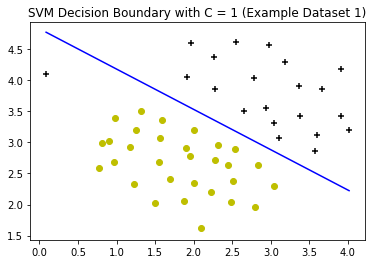

In [9]:
# You should try to change the C value below and see how the decision boundary varies (e.g., try C = 1000)
# C is a positive value that controls the penality of the misclassified training example. 
# A large C value tells SVM to try to classify all the examples correctly
C = 1; # by using C=1, 
model = svmTrain(X, y, C, 'linear', 1e-3, 20);
visualizeBoundaryLinear(X, y, model);
plt.title('SVM Decision Boundary with C = 1 (Example Dataset 1)')

C:\Users\jzhang11\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[LibSVM]

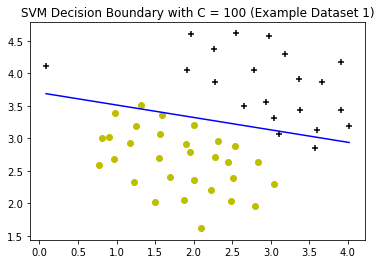

In [10]:
C = 100; # by using C=100, 
model = svmTrain(X, y, C, 'linear', 1e-3, 20);
visualizeBoundaryLinear(X, y, model);
plt.title('SVM Decision Boundary with C = 100 (Example Dataset 1)')

#### 2.2 SVM with Gaussian Kernels

Gaussian Kernel is a similarity function that measures the distance between a pair of examples (xi,xj). The Gaussian kernel is also parameterized by a bandwitdh parameter theta, which determines how fast the similarity metrics decreases to 0. 

<img src="../pic/Gaussian_kernel.jpg">

In [11]:
print('\nEvaluating the Gaussian Kernel ...\n')
x1 = np.array([1, 2, 1]);
x2 = np.array([0, 4, -1]); 
sigma = 2;
sim = gaussianKernel(x1, x2, sigma);
print('The calculated cost is: ', np.round(sim,6))
print('The true cost is 0.324652')


Evaluating the Gaussian Kernel ...

The calculated cost is:  0.324652
The true cost is 0.324652


#### 2.3 Visualize dataset 2

The following code will load the ex6data2.mat into the environment and plot the data

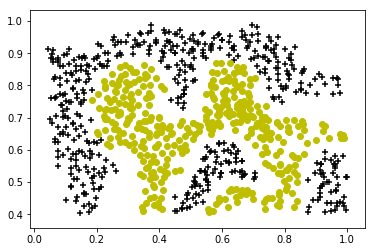

In [12]:
data2=loadmat('ex6data2.mat')
X=data2['X']
y=data2['y']
plotData(X,y)

#### 2.4 Training SVM with RBF kernel (dataset 2)

After you have implemented the kernel, we can now use it to train the SVM classifier.

In [13]:
print('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n');

# Load from ex6data2: 
# You will have X, y in your environment
# SVM Parameters

C = 1; 
sigma = 0.1;

# We set the tolerance and max_passes lower here so that the code will run faster. 
# However, in practice, you will want to run the training to convergence.

model= svmTrain(X, y, C, 'gaussian', tol=1e-3, max_passes=-1, sigma=0.1); 



Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...

[LibSVM]

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def visualizeBoundary(X, y, model, varargin=0):
    #   VISUALIZEBOUNDARY plots a non-linear decision boundary learned by the SVM
    # Plot the training data on top of the boundary
    plotData(X, y)

    # Make classification predictions over a grid of values
    x1plot = np.linspace(X[:,0].min(), X[:,0].max(), 100).T
    x2plot = np.linspace(X[:,1].min(), X[:,1].max(), 100).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape) #100X100
    for i in range(X1.shape[1]):
       this_X = np.column_stack((X1[:, i], X2[:, i]))  #predict this new observation
       vals[:, i] = model.predict(gaussianKernelGramMatrix(this_X, X, sigma))

    # Plot the SVM boundary
    plt.contour(X1, X2, vals, colors=['b'])
    plt.show(block=False)

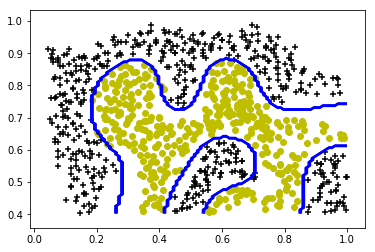

In [33]:
visualizeBoundary(X, y, model);

#### 2.5 Visualizing Dataset 3 ex6data3.mat

The following code will load the next dataset into your environment and plot the data. 

In [37]:
data3=loadmat('ex6data3.mat')
X=data3['X']
y=data3['y']
Xval=data3['Xval']
yval=data3['yval']
print(X.shape)
print(y.shape)
print(Xval.shape)
print(yval.shape)

(211, 2)
(211, 1)
(200, 2)
(200, 1)


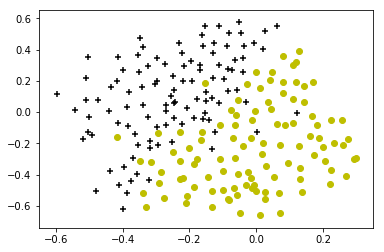

In [38]:
# plotting the training data
plotData(X,y)

#### 2.6 Training SVM with radius based function (RBF) Kernel or Gaussian Kernel (Dataset 3)

This is a different dataset that you can use to experiment with. Try different values of C and sigma here. When implements the cross validation to select the best C and sigma parameter, we need to evaluate the error on the cross-validation set. For classification, the error is defined as the fraction of cross-validation examples that were classified incorrectly. 

In [44]:
def dataset3Params(X, y, Xval, yval):
    
#DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
#where you select the optimal (C, sigma) learning parameters to use for SVM
#with RBF kernel
#   [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
#   sigma. You should complete this function to return the optimal C and 
#   sigma based on a cross-validation set.
    minerror=1

# You need to return the following variables correctly.
# iterate over values of sigma and C
    finalsigma=0.1
    finalC=1
    
    for sigma in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
        for C in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]:
            model= svmTrain(X, y, C, 'gaussian', tol=1e-3, max_passes=-1, sigma=sigma);  
            predict = model.predict(gaussianKernelGramMatrix(Xval, X, sigma))
            predicterror=np.mean(yval.flatten()==predict.flatten())*100
            if predicterror<minerror:
                minerror=predicterror
                finalsigma=sigma
                finalC=C

# ====================== YOUR CODE HERE ======================
# Instructions: Fill in this function to return the optimal C and sigma
#               learning parameters found using the cross validation set.

    
#  Note: You can compute the prediction error using 
#        mean(double(predictions ~= yval))
#

    return finalC, finalsigma


In [45]:
C,sigma=dataset3Params(X, y, Xval, yval)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[LibSVM]

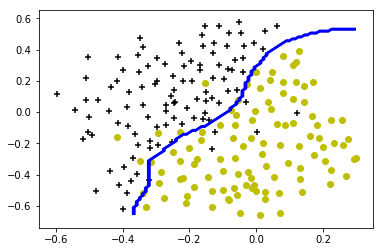

In [46]:
# train model on training corpus with current sigma and C
model = svmTrain(X, y, C, "gaussian", sigma=sigma)
visualizeBoundary(X, y, model)